<a href="https://colab.research.google.com/github/12Nepo/regresion_lineal/blob/main/Girona_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df= pd.read_csv("Datos_limpios_ESP.csv")
df

<ipython-input-16-c6c898c7070e>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Datos_limpios_ESP.csv")


,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.940000,4.890000,4.910000,4.63000,4.740000,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.850000,4.850000,4.910000,4.69000,4.800000,1.0,0.0,0.0,0.0,0.51
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.310000,4.810000,4.760000,4.74000,4.320000,2.0,2.0,0.0,0.0,0.62
3,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.500000,4.860000,5.000000,4.63000,4.500000,6.0,1.0,0.0,0.0,0.08
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.820000,4.730000,4.730000,4.91000,4.360000,1.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19651,19650,https://www.airbnb.com/rooms/858386613168601750,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,sin informacion,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/26281633,MÂª Dolors,...,4.547288,4.701278,4.713507,4.72281,4.447319,34.0,34.0,0.0,0.0,0.26
19652,19651,https://www.airbnb.com/rooms/858396134121337855,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",sin informacion,https://a0.muscache.com/pictures/6351279f-294b...,https://www.airbnb.com/users/show/444428600,Alina,...,4.547288,4.701278,4.713507,4.72281,4.447319,1.0,1.0,0.0,0.0,0.26
19653,19652,https://www.airbnb.com/rooms/858410917126332945,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/491503593,Administracions Saturno,...,4.547288,4.701278,4.713507,4.72281,4.447319,9.0,9.0,0.0,0.0,0.26
19654,19653,https://www.airbnb.com/rooms/858418062773719271,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,sin informacion,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/389605038,Winahost,...,4.547288,4.701278,4.713507,4.72281,4.447319,54.0,54.0,0.0,0.0,0.26


In [17]:
DFF = df[df["room_type"].isin(["Private room"])]

In [18]:
DFFN = DFF.dropna()


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

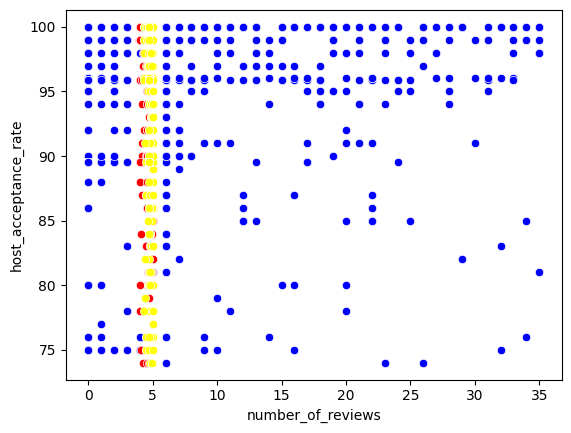

In [19]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=DFFN)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=DFFN)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=DFFN)

In [20]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= DFFN[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= DFFN['host_acceptance_rate']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.02009306,  1.43076066,  2.00707402]),
 'rank_': 3,
 'singular_': array([272.48602438,   8.60916443,   4.06458834]),
 'intercept_': 79.47835749505717}

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.008732352158406287

In [26]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=DFFN[['number_of_reviews', 'review_scores_cleanliness', 'review_scores_communication']])
y_pred

array([96.28049023, 96.15172177, 95.77131301, ..., 95.44479463,
       95.44479463, 95.44479463])

In [27]:
#Insertamos la columna de predicciones en el DataFrame
DFFN.insert(3, 'Predicciones', y_pred)
DFFN

,Unnamed: 0,listing_url,last_scraped,Predicciones,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,96.280490,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,...,4.940000,4.890000,4.910000,4.63000,4.740000,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,96.151722,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,...,4.850000,4.850000,4.910000,4.69000,4.800000,1.0,0.0,0.0,0.0,0.51
3,3,https://www.airbnb.com/rooms/751638,31/03/2023,95.771313,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,...,4.500000,4.860000,5.000000,4.63000,4.500000,6.0,1.0,0.0,0.0,0.08
12,12,https://www.airbnb.com/rooms/755927,31/03/2023,95.751220,city scrape,Room Oliva - Casa Pati de lÂ´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/9eeac113-fa97...,https://www.airbnb.com/users/show/3680160,...,4.500000,5.000000,5.000000,4.70000,4.900000,6.0,1.0,0.0,0.0,0.09
13,13,https://www.airbnb.com/rooms/756145,31/03/2023,95.441392,city scrape,Room Abeto - Casa Pati de lÂ´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276036/162f...,https://www.airbnb.com/users/show/3680160,...,4.550000,4.820000,4.820000,4.36000,4.450000,6.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19535,19534,https://www.airbnb.com/rooms/856369517825070847,01/04/2023,95.444795,city scrape,Tienda Emperador,La suite de Kampaoh. La Emperador aÃºna un dis...,sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/402693655,...,4.547288,4.701278,4.713507,4.72281,4.447319,16.0,0.0,0.0,0.0,0.26
19536,19535,https://www.airbnb.com/rooms/856374162403620030,01/04/2023,95.444795,city scrape,Tienda Emperador Junior,"Como si de una jÃºnior suite se tratara, la Em...",sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/402693655,...,4.547288,4.701278,4.713507,4.72281,4.447319,16.0,0.0,0.0,0.0,0.26
19547,19546,https://www.airbnb.com/rooms/852831142413408392,01/04/2023,95.444795,city scrape,place with 1 room,place with 1 room <br />place with 1 room <b...,sin informacion,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/506574702,...,4.547288,4.701278,4.713507,4.72281,4.447319,1.0,0.0,0.0,0.0,0.26
19574,19573,https://www.airbnb.com/rooms/858471895814418075,01/04/2023,95.444795,city scrape,Creu de St Pol Apto. 5 pax. 200 mts de mar F30087,<b>License number</b><br />HUTG-016424,sin informacion,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/127300118,...,4.547288,4.701278,4.713507,4.72281,4.447319,74.0,73.0,0.0,0.0,0.26


TypeError: ignored

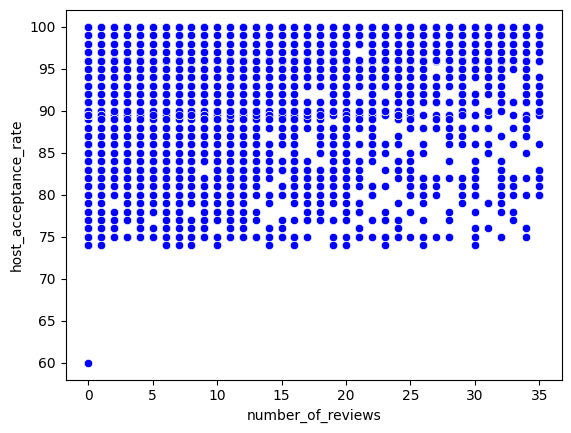

In [29]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Unnamed: 0', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [46]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.2436367591971006

In [47]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.49359574471129775

#**Hotel Room**

In [30]:
df= pd.read_csv("Datos_limpios_ESP.csv")
df

<ipython-input-30-c6c898c7070e>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Datos_limpios_ESP.csv")


,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.940000,4.890000,4.910000,4.63000,4.740000,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.850000,4.850000,4.910000,4.69000,4.800000,1.0,0.0,0.0,0.0,0.51
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.310000,4.810000,4.760000,4.74000,4.320000,2.0,2.0,0.0,0.0,0.62
3,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.500000,4.860000,5.000000,4.63000,4.500000,6.0,1.0,0.0,0.0,0.08
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.820000,4.730000,4.730000,4.91000,4.360000,1.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19651,19650,https://www.airbnb.com/rooms/858386613168601750,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,sin informacion,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/26281633,MÂª Dolors,...,4.547288,4.701278,4.713507,4.72281,4.447319,34.0,34.0,0.0,0.0,0.26
19652,19651,https://www.airbnb.com/rooms/858396134121337855,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",sin informacion,https://a0.muscache.com/pictures/6351279f-294b...,https://www.airbnb.com/users/show/444428600,Alina,...,4.547288,4.701278,4.713507,4.72281,4.447319,1.0,1.0,0.0,0.0,0.26
19653,19652,https://www.airbnb.com/rooms/858410917126332945,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",sin informacion,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/491503593,Administracions Saturno,...,4.547288,4.701278,4.713507,4.72281,4.447319,9.0,9.0,0.0,0.0,0.26
19654,19653,https://www.airbnb.com/rooms/858418062773719271,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,sin informacion,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/389605038,Winahost,...,4.547288,4.701278,4.713507,4.72281,4.447319,54.0,54.0,0.0,0.0,0.26


In [31]:
DFF = df[df["room_type"].isin(["Hotel room"])]

In [32]:
DFFN = DFF.dropna()


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

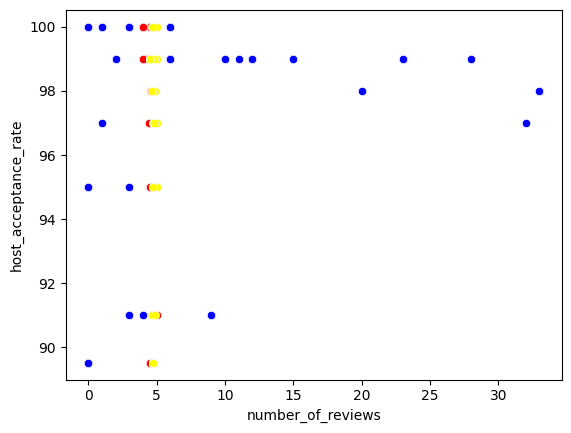

In [33]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=DFFN)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=DFFN)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=DFFN)

In [34]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= DFFN[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= DFFN['host_acceptance_rate']

In [35]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [36]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [37]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [38]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.18898511, 1.83069783, 9.24920755]),
 'rank_': 3,
 'singular_': array([57.12745817,  1.791823  ,  0.8617218 ]),
 'intercept_': 42.3940803210872}

In [39]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2436367591971006

In [40]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=DFFN[['number_of_reviews', 'review_scores_cleanliness', 'review_scores_communication']])
y_pred

array([ 93.91734552,  96.88204269,  95.9933471 , 101.59562467,
        98.5457263 ,  96.34957778,  97.80122034,  98.09187319,
        98.75072261,  96.3408796 ,  96.15049679,  98.36056254,
        94.31499113,  94.31499113, 100.22616173,  97.98259233,
        94.70419377,  96.52255168,  98.47706035,  95.25188492,
        96.54485961,  95.63920302,  98.36056254,  94.31499113,
        94.31499113,  97.98259233,  98.41013655,  98.36056254,
        96.1518945 ,  96.23724576,  96.19415547,  98.92751786,
       102.53576428,  96.51016002,  95.9151167 ,  97.60380757,
        94.31499113,  98.24537374,  95.50722543,  94.31499113,
        94.31499113,  98.92751786,  94.31499113,  94.31499113,
        94.31499113,  94.31499113,  94.31499113,  94.31499113,
        94.31499113,  95.7795713 ])

In [41]:
#Insertamos la columna de predicciones en el DataFrame
DFFN.insert(3, 'Predicciones', y_pred)
DFFN

,Unnamed: 0,listing_url,last_scraped,Predicciones,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1223,1223,https://www.airbnb.com/rooms/7027939,31/03/2023,93.917346,city scrape,K-4 Apartment with views and pool,"Apartment in a quiet area, with swimming pool<...","Originally a fishing village, Calella has beco...",https://a0.muscache.com/pictures/68a0d1b9-a0c0...,https://www.airbnb.com/users/show/4629712,...,4.170000,4.800000,4.500000,4.80000,4.000000,110.0,102.0,0.0,0.0,0.13
1391,1390,https://www.airbnb.com/rooms/8787562,31/03/2023,96.882043,city scrape,Lujoso apartamento en primera linea de mar,Alquiler de un apartamento para 8 personas en ...,Cap sa Sal es un hotel de 5 estrellas reconver...,https://a0.muscache.com/pictures/686d1ae6-3c7e...,https://www.airbnb.com/users/show/46056847,...,4.590000,4.770000,4.860000,4.93000,4.630000,1.0,0.0,0.0,0.0,0.30
1617,1616,https://www.airbnb.com/rooms/11372300,01/04/2023,95.993347,city scrape,SR-28 Apartment near to Sa Riera beach,This comfortable apartment is located in a qui...,sin informacion,https://a0.muscache.com/pictures/430ede61-2dcc...,https://www.airbnb.com/users/show/4629712,...,4.500000,4.500000,4.700000,4.70000,4.300000,110.0,102.0,0.0,0.0,0.12
1830,1829,https://www.airbnb.com/rooms/12614906,01/04/2023,101.595625,city scrape,B-15 Apartment Begur,This apartment/duplex is located in the center...,"Located in the heart of EmpordÃ , the town of ...",https://a0.muscache.com/pictures/1952be80-e31e...,https://www.airbnb.com/users/show/4629712,...,4.540000,4.640000,4.930000,4.75000,4.610000,110.0,102.0,0.0,0.0,0.34
2062,2061,https://www.airbnb.com/rooms/13049755,01/04/2023,98.545726,city scrape,"B-5 Apartment nearby the center with views, Begur",Comfortable duplex apartment with sea views lo...,sin informacion,https://a0.muscache.com/pictures/d7f58310-293d...,https://www.airbnb.com/users/show/4629712,...,4.730000,4.910000,4.910000,4.91000,4.450000,110.0,102.0,0.0,0.0,0.13
2064,2063,https://www.airbnb.com/rooms/13049759,01/04/2023,96.349578,city scrape,"ST-4 Apartment with sea views and pool, Sa Tuna.",Composed of a comfortable living room with sem...,"Located in the heart of EmpordÃ , the town of ...",https://a0.muscache.com/pictures/a52c90d2-4b77...,https://www.airbnb.com/users/show/4629712,...,4.330000,4.600000,4.670000,4.73000,4.530000,110.0,102.0,0.0,0.0,0.21
2336,2335,https://www.airbnb.com/rooms/14003102,01/04/2023,97.801220,city scrape,La chambre des secrets,"La chambre est situÃ©e cÃ´tÃ© rue, elle est en...",Quartier trÃ¨s calme tout en Ã©tants situÃ©s ...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/46285425,...,4.890000,4.890000,4.900000,4.76000,4.800000,5.0,1.0,0.0,0.0,0.30
3423,3422,https://www.airbnb.com/rooms/18205547,01/04/2023,98.091873,city scrape,T-2 Apartment with community pool in Tamariu,The apartment has a living room with access to...,Tamariu is the smallest and wildest coastal to...,https://a0.muscache.com/pictures/f485f962-a0f9...,https://www.airbnb.com/users/show/4629712,...,4.750000,4.800000,5.000000,4.80000,4.500000,110.0,102.0,0.0,0.0,0.06
3469,3468,https://www.airbnb.com/rooms/17826903,01/04/2023,98.750723,city scrape,"SR-32 Duplex with sea views in Sa Riera, Begur",On the upper floor there is the living room wi...,"Located in the heart of the EmpordÃ , the town...",https://a0.muscache.com/pictures/9497c3ad-3d22...,https://www.airbnb.com/users/show/4629712,...,4.260000,4.480000,4.780000,4.70000,4.090000,110.0,102.0,0.0,0.0,0.33
3838,3837,https://www.airbnb.com/rooms/18588591,01/04/2023,96.340880,city scrape,BL-1 Duplex apartment in the center with pool,"Fantastic newly built duplex with lift, clo

TypeError: ignored

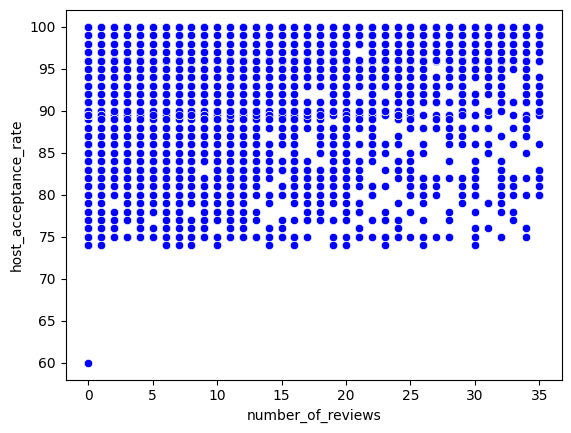

In [43]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='number_of_reviews', y='Unnamed: 0', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [44]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.2436367591971006

In [45]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.49359574471129775